# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [471]:
data = pd.read_csv("../data/states_edu.csv")
data.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [472]:
data.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

data.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [473]:
df = data.groupby("YEAR").sum()
years = df.drop(["PRIMARY_KEY", "STATE"], axis = 1)
years

,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,,,,,,,,,,,,,,,,,,,,,
1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2895932.0,2869754.0,2600516.0,0.0,0.0,39753172.0,0.0,0.0,0.0,0.0
1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2937636.0,2838513.0,2680825.0,0.0,0.0,40008213.0,0.0,0.0,0.0,0.0
1988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3050506.0,2853007.0,2649674.0,0.0,0.0,40188690.0,0.0,0.0,0.0,0.0
1989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3182098.0,2853464.0,2473278.0,0.0,0.0,40542707.0,0.0,0.0,0.0,0.0
1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3248065.0,2979123.0,2381083.0,0.0,0.0,41216683.0,213.0,10257.0,0.0,0.0
1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3314926.0,3020070.0,2392456.0,0.0,0.0,42046878.0,0.0,0.0,0.0,0.0
1992,0.0,233210984.0,15148508.0,106504038.0,111558438.0,237333143.0,125154024.0,69877598.0,0.0,20655398.0,...,3341737.0,3129006.0,2430536.0,0.0,0.0,42823312.0,9392.0,11452.0,9261.0,260.0
1993,40904771.0,243206654.0,15739744.0,112674291.0,114792619.0,244202408.0,129561976.0,72413365.0,12659974.0,20890815.0,...,3361110.0,3249266.0,2424031.0,0.0,0.0,43464916.0,0.0,0.0,0.0,0.0
1994,40870582.0,250750573.0,16688390.0,113508868.0,120553315.0,252664869.0,133930062.0,75321616.0,13408752.0,20611622.0,...,3425951.0,3302297.0,2487552.0,0.0,0.0,44111482.0,0.0,0.0,8721.0,260.0


There are 33 years of data ranging from 1986 to 2019.

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [474]:
states = data.groupby("STATE")
comparison = states["AVG_MATH_8_SCORE"].mean()
comparison




STATE
ALABAMA                 264.166667
ALASKA                  280.000000
ARIZONA                 274.666667
ARKANSAS                269.750000
CALIFORNIA              269.166667
COLORADO                283.181818
CONNECTICUT             282.250000
DELAWARE                277.181818
DISTRICT_OF_COLUMBIA    251.166667
DODEA                   287.200000
FLORIDA                 273.454545
GEORGIA                 272.833333
HAWAII                  269.583333
IDAHO                   281.833333
ILLINOIS                278.909091
INDIANA                 282.250000
IOWA                    283.818182
KANSAS                  286.100000
KENTUCKY                274.333333
LOUISIANA               265.500000
MAINE                   284.000000
MARYLAND                278.916667
MASSACHUSETTS           292.363636
MICHIGAN                276.166667
MINNESOTA               290.000000
MISSISSIPPI             264.454545
MISSOURI                279.272727
MONTANA                 286.818182
NATIONAL      

In [475]:
subset = comparison.loc[["OHIO", "MICHIGAN"]]
subset

STATE
OHIO        282.250000
MICHIGAN    276.166667
Name: AVG_MATH_8_SCORE, dtype: float64

We can see that Ohio averaged a higher Grade 8 Math test score than Michigan did :(

Find the average for your chosen test across all states in 2019

In [476]:
sick = pd.read_csv("../data/states_edu.csv")
wild = sick[sick["YEAR"] == 2019]
next = wild[["YEAR", "STATE", "AVG_MATH_8_SCORE"]]
next



,YEAR,STATE,AVG_MATH_8_SCORE
1662,2019,ALABAMA,269.0
1663,2019,ALASKA,274.0
1664,2019,ARIZONA,280.0
1665,2019,ARKANSAS,274.0
1666,2019,CALIFORNIA,276.0
1667,2019,COLORADO,285.0
1668,2019,CONNECTICUT,286.0
1669,2019,DELAWARE,277.0
1670,2019,DISTRICT_OF_COLUMBIA,269.0
1671,2019,DODEA,292.0


For each state, find a maximum value for your chosen test score

In [477]:
b = sick[["YEAR", "STATE", "AVG_MATH_8_SCORE"]]
maximum = b.groupby("STATE")["AVG_MATH_8_SCORE"].max()
maximum

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [478]:
value = sick.loc[:, ["STATE", "YEAR", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "AVG_MATH_8_SCORE"]]
value.loc[:, "Expenditure_Ratio"] = value["INSTRUCTION_EXPENDITURE"]/value["TOTAL_EXPENDITURE"]
final = value.groupby("STATE")["Expenditure_Ratio"].mean()
final


STATE
ALABAMA                 0.521403
ALASKA                  0.491523
ARIZONA                 0.457617
ARKANSAS                0.521585
CALIFORNIA              0.502896
COLORADO                0.482497
CONNECTICUT             0.565999
DELAWARE                0.532793
DISTRICT_OF_COLUMBIA    0.432755
DODEA                        NaN
FLORIDA                 0.484254
GEORGIA                 0.540446
HAWAII                  0.552539
IDAHO                   0.547688
ILLINOIS                0.504680
INDIANA                 0.492769
IOWA                    0.498946
KANSAS                  0.512818
KENTUCKY                0.522443
LOUISIANA               0.528853
MAINE                   0.563814
MARYLAND                0.540843
MASSACHUSETTS           0.570868
MICHIGAN                0.476263
MINNESOTA               0.507929
MISSISSIPPI             0.526388
MISSOURI                0.516266
MONTANA                 0.554035
NATIONAL                     NaN
NEBRASKA                0.558350
NEVA

I did a small feature where I basically took the expenditure ratio of every state from every year.  I did this by dividing their spending on instruction by their total spending.  This gives a ratio of how much they spend on instruction out of their total spending. 

I then grouped by state and took the mean of all the ratios for each respective state. 

By doing this, I can now see a percentage of how much each state spends out of their total spending across thirty years of data. 

I can see that historically Arizona spends the lowest percentage on instruction at 45% whereas Connecticut spends the greatest percentage on instruction at 56%. 

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: title={'center': 'Distribution of Expenditure Spending Ratio'}, ylabel='Frequency'>

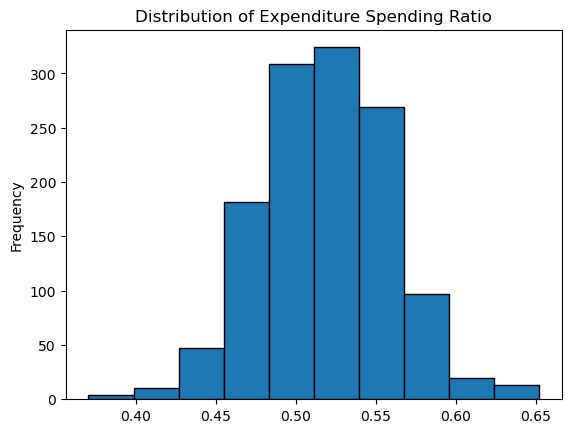

In [479]:
value.Expenditure_Ratio.plot.hist(title="Distribution of Expenditure Spending Ratio", edgecolor="black")

I made a visualization regarding the feature I created.  

In my feature I noted how Arizona had the lowest average ratio expenditure at just over 45%.  In this visualization we can see that there are a number of occurences that dip below 45% and even into the 35-40% group.  

On the flip side, we can see that there are years where states spent well above Connecticut's average mark of 56%, peaking up to 65%. 

The bulk of the data is contained within a few percentage points of 50%.

**<CAPTION FOR VIZ 1>**

**Visualization 2**

<Axes: xlabel='Expenditure_Ratio', ylabel='AVG_MATH_8_SCORE'>

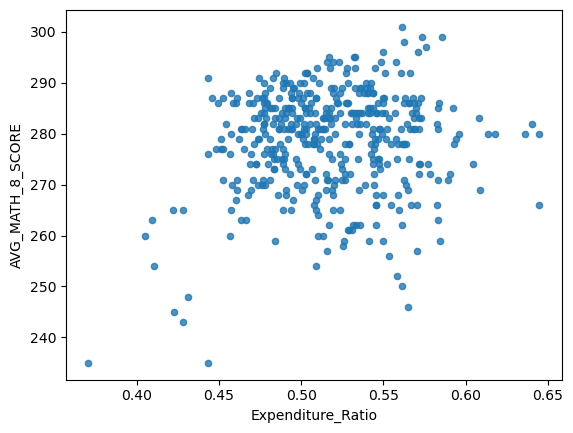

In [480]:
value.plot.scatter(x='Expenditure_Ratio', y='AVG_MATH_8_SCORE', alpha=0.8)


**<CAPTION FOR VIZ 2>**

The scatter plot shows the comparison between the ratio of instruction expenditure spending and Grade 8 Math test scores.  

It would require more statistical analysis, like regression, to determine any relationship between the two variables.

However, at first glance, it does look like there might be a slight positive relationship between the two variables. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [481]:
from sklearn.model_selection import train_test_split

In [482]:
X = value[["Expenditure_Ratio"]].dropna()
y = value.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(),inplace=True)

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [484]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [485]:
# create your model here
model = LinearRegression()

In [486]:
model.fit(X_train, y_train)

LinearRegression()

In [487]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [488]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)


277.50933307998145
[5.17691279]


0.011195312796929202

Most interesting from these metrics was the R^2 test which resulted in a super low value.  This indicates there may not be any causation between Expenditure Ratio and scores as we may have believed prior.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior on Testing Set')

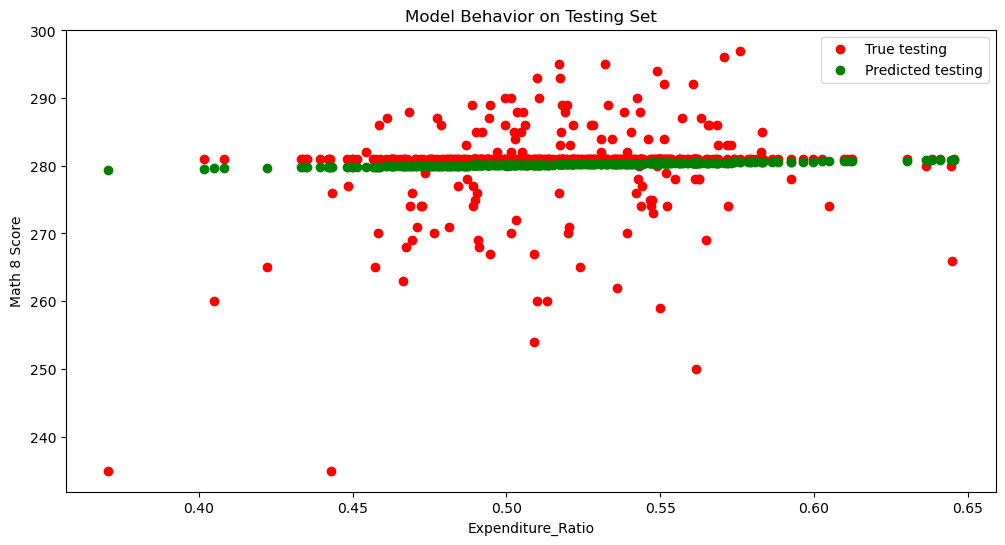

In [495]:
col_name = 'Expenditure_Ratio'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "red")
plt.scatter(X_test[col_name], model.predict(X_test), color = "green")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

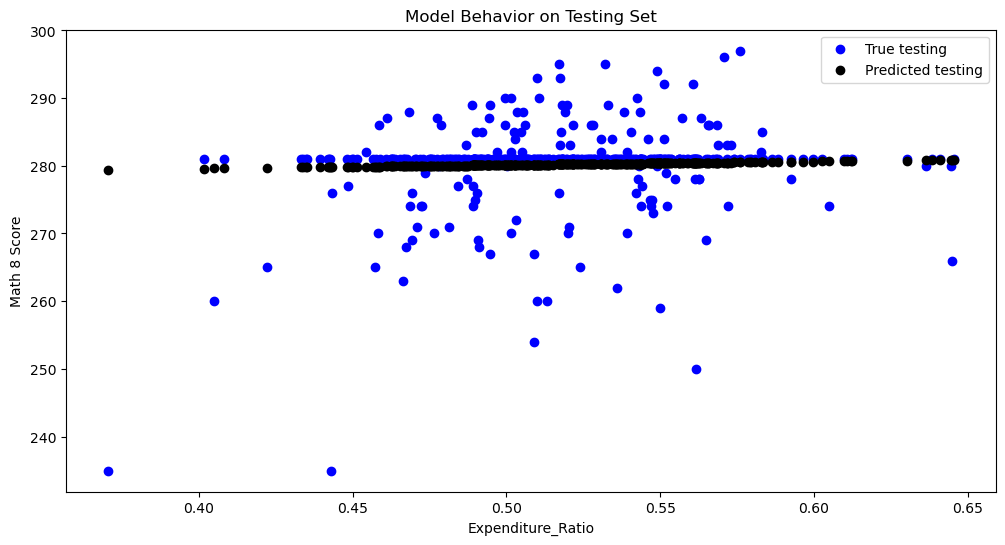

In [496]:
col_name = "Expenditure_Ratio"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")